Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Load the data

In [ ]:
data=pd.read_csv('StudentPerformanceFactors.csv')

In [ ]:
data.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [ ]:
data.tail()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68
6606,15,67,Medium,Low,Yes,9,94,Medium,Yes,0,Medium,Medium,Public,Positive,4,No,Postgraduate,Near,Male,64


Filter valid exam scores

In [ ]:
data=data[(data['Exam_Score']>0) & (data['Exam_Score']<=100)]

Removing/Filling Null Values

In [ ]:
data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0],inplace=True)
data['Distance_from_Home'].fillna(data['Distance_from_Home'].mode()[0],inplace=True)
data['Teacher_Quality'].fillna(data['Teacher_Quality'].mode()[0],inplace=True)

/tmp/ipython-input-3796234483.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0],inplace=True)
/tmp/ipython-input-3796234483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Parental_Education_Level'].fillna(data['Parental_Education_Level'].mode()[0],i

Feature and target

In [ ]:
X=data[['Hours_Studied']]
Y=data['Exam_Score']

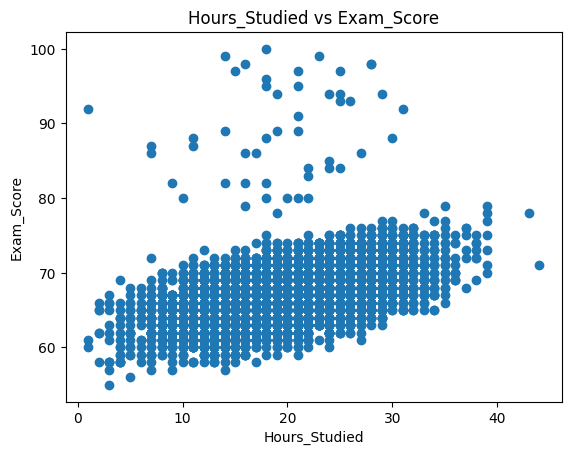

In [ ]:
plt.scatter(X,Y)
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.title('Hours_Studied vs Exam_Score')
plt.show()

Linear Regression

In [ ]:
model=LinearRegression()

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
X_Predict=model.predict(X_test)

In [ ]:
r2=r2_score(Y_test,X_Predict)
mse=mean_squared_error(Y_test,X_Predict)

In [ ]:
print("R2 Value : ",r2)
print("Mean Squared Value : ",mse)

R2 Value :  0.24685419920309715
Mean Squared Value :  9.959765026425044


Plot Linear Regression

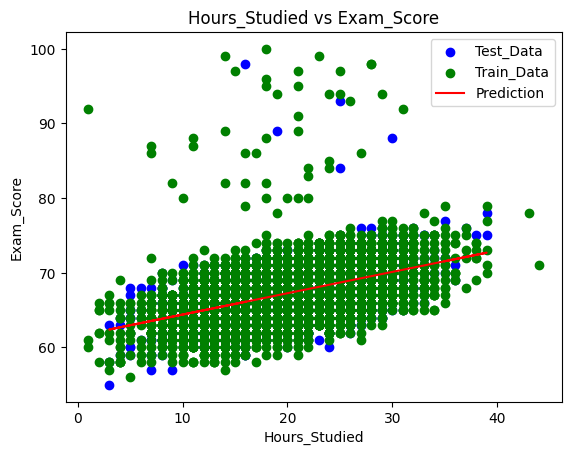

In [ ]:
plt.scatter(X_test,Y_test,color='blue',label='Test_Data')
plt.scatter(X_train,Y_train,color='green',label='Train_Data')
plt.plot(X_test,X_Predict,color='red',label='Prediction')
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')
plt.title('Hours_Studied vs Exam_Score')
plt.legend()
plt.show()

In [ ]:
model.score(X_test,Y_test)

0.24685419920309715

In [ ]:
model.score(X_train,Y_train)

0.18883663374113968